In this notebook we will be staying strictly in the Python world. We will read the audio file using Python, perform linear reassignment importing the functionality from linear_reassignment.py and display the results.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from linear_reassignment import create_reassigned_representation, plot_spectogram
from scipy.io import wavfile

In [2]:
sr, x = wavfile.read('data/whale_singing_excerpt.wav')

In [3]:
sr

16000

In [4]:
x[:10]

array([  71,  -19,  -20,  106,   96,   81,  -14,   30, -115,  -97],
      dtype=int16)

The data is in incorrect format. The [documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html) of `wavfile.read` is silent on what is the range of values that it returns.

After a little bit of experimentation I came to the conclusion that the amplitudes as returned by `wavfile.read` can take on the full range of values available to int16 numbers, that is from -32768 to +32767

In [5]:
x = x / 32768

In [6]:
x[:10]

array([ 0.00216675, -0.00057983, -0.00061035,  0.00323486,  0.00292969,
        0.00247192, -0.00042725,  0.00091553, -0.00350952, -0.00296021])

I verified that these values are in line with what `audioread` returns in Matlab.

If we use the same parameter values we used in earlier notebooks...

In [7]:
q = 1;
tdeci = 300;
over = 2;
noct = 100;
minf = 0.03125;
maxf = 0.07;

In [8]:
%%time

x = x.reshape((-1, 1)) # the function expects signal of shape (N, 1)
spectogram = create_reassigned_representation(x, q, tdeci, over, noct, minf, maxf)

CPU times: user 25.7 s, sys: 14 s, total: 39.8 s
Wall time: 7 s


/home/radek/anaconda3/envs/fastai/lib/python3.7/site-packages/scipy/sparse/compressed.py:287: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)
/home/radek/anaconda3/envs/fastai/lib/python3.7/site-packages/scipy/sparse/_index.py:127: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


The warning, for our use case, is incorrect. We only spend a neglible amount of time on the operation that this warning pertains to.

We can visualize the resultant spectogram like we did previously, using `imshow`.

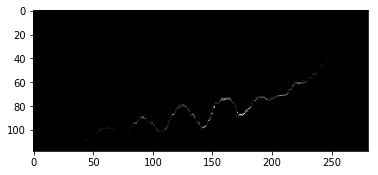

In [9]:
plt.imshow(spectogram.todense().T, plt.cm.gray, interpolation='none')

A lot of the information in the spectogram is not visible due to using a linear scale for the color map (there are quite a few of low values that become invisible).

Also, the axes do not contain any useful information. Let's see if we can improve on this.

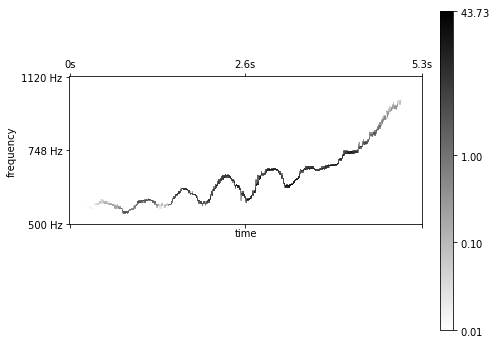

In [10]:
plot_spectogram(spectogram, sr, minf, maxf, tdeci)